# Практическое задание 1


Импорт необходимых библиотек

In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.preprocessing import OneHotEncoder
import graphviz
from IPython.display import SVG

Считывание необходимого набора данных из файла.
Данные представляют собой информацию о пациентах, страдающих болезнями сердца.


In [4]:
file=pd.read_csv("Heart.csv", sep=",")
file.head()


,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


Получаем информации о столбцах и их типах данных


In [5]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


Разделение данных на входные данные для модели и целевую переменную 

In [6]:
file.info()
y = file['Thal']
x = file.drop(columns=['Thal', 'Unnamed: 0'])



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


Используем метод one_hot_encoding для избавления от категориальных признаков

In [7]:
ohe_X = pd.get_dummies(x , columns=['ChestPain', 'AHD'])


Находим NaN значения во входных данных модели

In [8]:
# ohe_X[ohe_X['Ca'].isna()]
ohe_X[ohe_X.isna().any(axis=1)]

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,AHD_No,AHD_Yes
166,52,1,138,223,0,0,169,0,0.0,1,NaN,0,1,0,0,1,0
192,43,1,132,247,1,2,143,1,0.1,2,NaN,1,0,0,0,0,1
287,58,1,125,220,0,0,144,0,0.4,2,NaN,0,0,1,0,1,0
302,38,1,138,175,0,0,173,0,0.0,1,NaN,0,1,0,0,1,0


Заменяем значения NaN средним

In [9]:
meanValForCa = float(round(ohe_X['Ca'].mean()))
ohe_X['Ca'][166] = meanValForCa
ohe_X['Ca'][192] = meanValForCa
ohe_X['Ca'][287] = meanValForCa
ohe_X['Ca'][302] = meanValForCa
ohe_X[ohe_X.isna().any(axis=1)]

C:\Users\mihai\AppData\Local\Temp\ipykernel_6072\784206997.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ohe_X['Ca'][166] = meanValForCa
C:\Users\mihai\AppData\Local\Temp\ipykernel_6072\784206997.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ohe_X['Ca'][192] = meanValForCa
C:\Users\mihai\AppData\Local\Temp\ipykernel_6072\784206997.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ohe_X['Ca'][287] = meanValForCa
C:\Users\m

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,AHD_No,AHD_Yes


Находим NaN значения в целевой переменной

In [10]:
y[y.isna() == True]


87     NaN
266    NaN
Name: Thal, dtype: object

Узнаем спектр доступных значений у

In [11]:
y.unique()

array(['fixed', 'normal', 'reversable', nan], dtype=object)

Заменяем все вхождения NaN случайным выбром из спектра доступных значений

In [12]:
import random
random.seed(10)
variants = ['fixed', 'normal', 'reversable']
y[87] = random.choice(variants)
y[266] = random.choice(variants)
y[y.isna() == True]


C:\Users\mihai\AppData\Local\Temp\ipykernel_6072\3560712748.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[87] = random.choice(variants)
C:\Users\mihai\AppData\Local\Temp\ipykernel_6072\3560712748.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[266] = random.choice(variants)


Series([], Name: Thal, dtype: object)

Построим классификатор(дерево принятия решений) и обучим его

In [13]:
clf= DecisionTreeClassifier(max_depth=3, random_state=0, min_samples_leaf=5)
clf.fit(ohe_X, y)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=0)

Изучим вклад отдельных атрибутов(важность переменных)

In [14]:
pd.DataFrame(data = clf.feature_importances_, index=ohe_X.columns, columns=['feature_importances'])

,feature_importances
Age,0.124070
Sex,0.150762
RestBP,0.000000
Chol,0.009903
Fbs,0.000000
RestECG,0.000000
MaxHR,0.000000
ExAng,0.000000
Oldpeak,0.089731
Slope,0.000000


наиболее важными атрибутами оказались AHD, Age, Sex


Визуализация дерева решений в виде графа

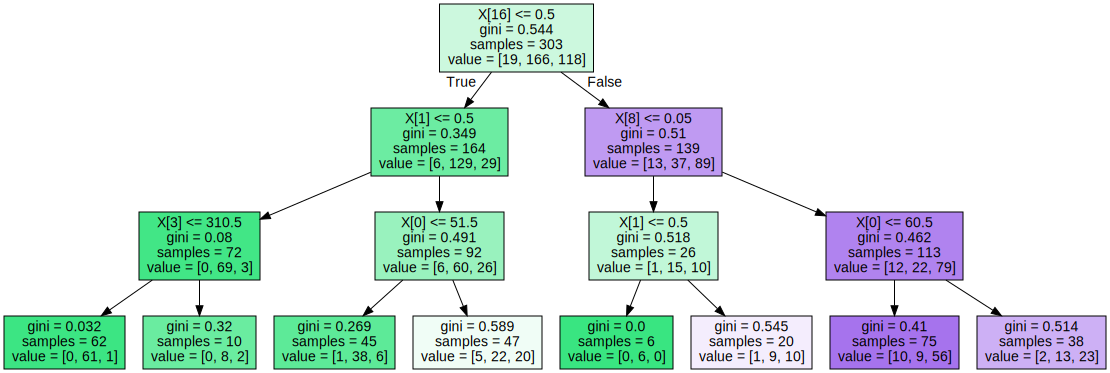

In [17]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'
dot_data = export_graphviz(clf, out_file=None, filled=True)
graph = graphviz.Source(dot_data)
SVG(graph.pipe(format='svg'))